# PS4

# Siyuan Peng

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy.linalg as LA

## (a)

In [2]:
import scipy.stats as sts
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
rho = 0.85
mu = 11.4
z_t = np.zeros(T+1)
z_t[0] = mu
for i in range(1, T+1):
    z_t[i] = rho * z_t[i-1] + (1 - rho) * mu + eps_vec[i-1]

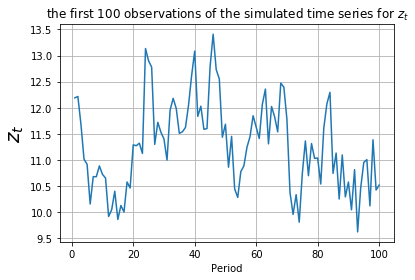

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,101), z_t[1:101])
ax.set_xlabel('Period')
ax.set_ylabel('$z_t$', size = 20)
ax.set_title('the first 100 observations of the simulated time series for $z_t$')
ax.grid()

## (b)

In [4]:
z_vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 5)
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

## (c)

In [5]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [34]:
Phat = np.zeros((5,5))
def transform(series, cuts = z_cuts):
    # transform continuous variable to discrete bins
    discrete = np.zeros_like(series)
    for i in range(len(series)):
        if series[i] <= cuts[0]:
            discrete[i] = 1
        elif series[i] <= cuts[1]:
            discrete[i] = 2
        elif series[i] <= cuts[2]:
            discrete[i] = 3
        elif series[i] <= cuts[3]:
            discrete[i] = 4
        else:
            discrete[i] = 5
    return discrete
z_t_bins = transform(z_t)
for i in range(5):
    for j in range(5):
        for k in range(len(z_t_bins)-1):
            if z_t_bins[k] == i+1 and z_t_bins[k+1] == j+1:
                Phat[i,j] += 1
for i in range(5):
    Sum = Phat[i,:].sum()
    Phat[i,:] = Phat[i,:]/Sum
print('Phat is\n', Phat)

Phat is
 [[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.0304878  0.2195122  0.48170732 0.23170732 0.03658537]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


## (d)

In [11]:
Phat_3 = Phat @ Phat @ Phat
print('The transition probability of bin 3 at t to bin 5 at t+3 is {} %'.format(round(100 * Phat_3[2,4], 2)))

The transition probability of bin 3 at t to bin 5 at t+3 is 8.06 %


## (e)

In [12]:
value, vectors = np.linalg.eig(Phat)
Phat_n = vectors @ np.diag(np.array([1,0,0,0,0])) @ np.linalg.inv(vectors)
print('The stationary distribution of z_t is', Phat_n[0,:])

The stationary distribution of z_t is [0.1045698  0.24154031 0.32373493 0.23529555 0.09485941]


In [14]:
# Double Check
np.dot(LA.matrix_power(Phat.T, 10000), np.array([1,0,0,0,0]))

array([0.1045698 , 0.24154031, 0.32373493, 0.23529555, 0.09485941])

## (f)

In [35]:
def transform2(P):
    # transform pdf matrix to cdf matrix
    P_new = np.zeros_like(P)
    P_new[:,0] = P[:,0]
    for i in range(1,P.shape[1]):
        P_new[:,i] = P_new[:,i-1] + P[:,i]
    return P_new
new_z_t = np.zeros(T+1)
new_z_t_idx = np.zeros(T+1, dtype = 'int')
new_z_t[0] = z_vals[2]
new_z_t_idx[0] = 2
Phat_sum = transform2(Phat)
for i in range(T):
    cdf_t = Phat_sum[new_z_t_idx[i],:]
    new_z_t_idx[i+1] = transform(np.array([unif_vec[i]]), cuts = cdf_t)[0]-1
    new_z_t[i+1] = z_vals[new_z_t_idx[i+1]]

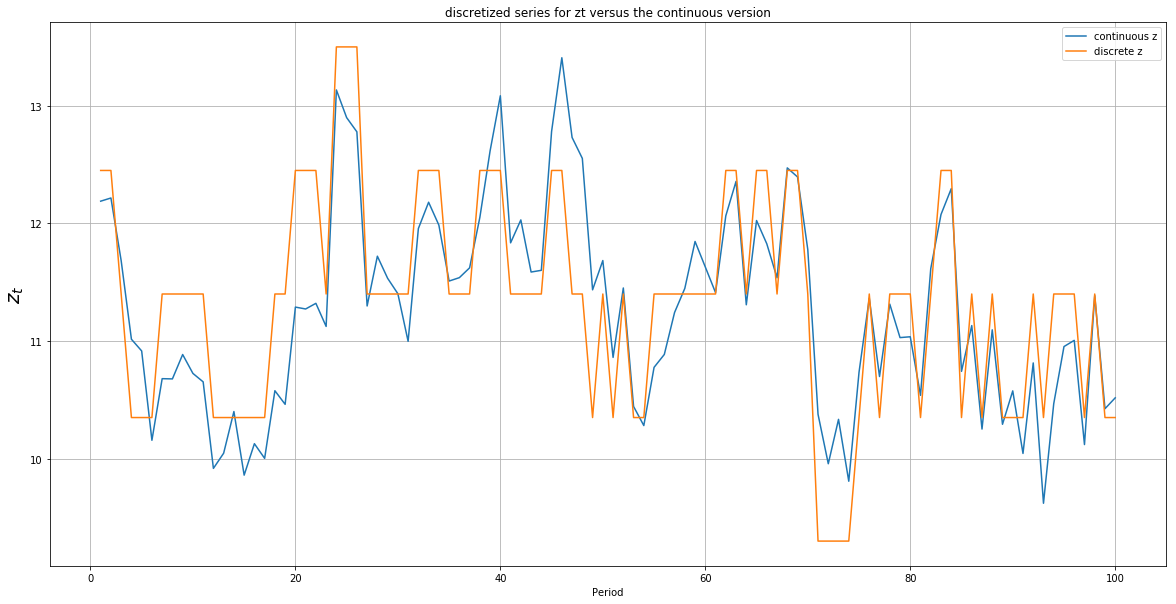

In [36]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(np.arange(1,101), z_t[1:101], label = 'continuous z')
ax.plot(np.arange(1,101), new_z_t[1:101], label = 'discrete z')
ax.set_xlabel('Period')
ax.set_ylabel('$z_t$', size = 20)
ax.set_title('discretized series for zt versus the continuous version')
ax.legend()
ax.grid()